In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['heart.csv']


In [2]:
df = pd.read_csv("../input/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


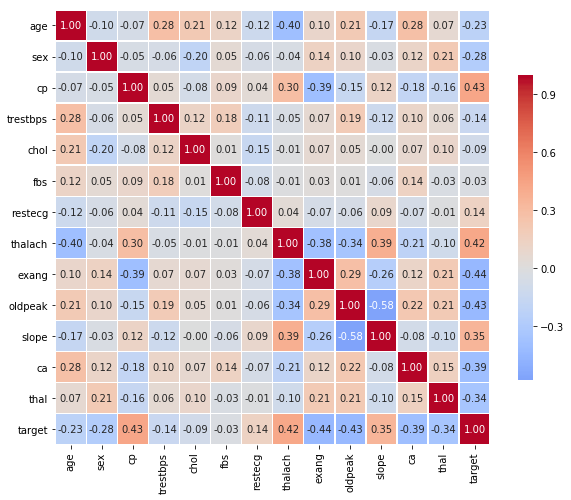

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
def correlation_heatmap(dataframe):
    correlations = dataframe.corr()
    sns.heatmap(correlations, vmax=1.0, center=0, fmt=".2f", square=True, 
               linewidth=.5, annot=True, cmap="coolwarm", 
                cbar_kws={"shrink":.70})
    fig=plt.gcf()
    fig.set_size_inches(10,8)
    plt.show()
correlation_heatmap(df)


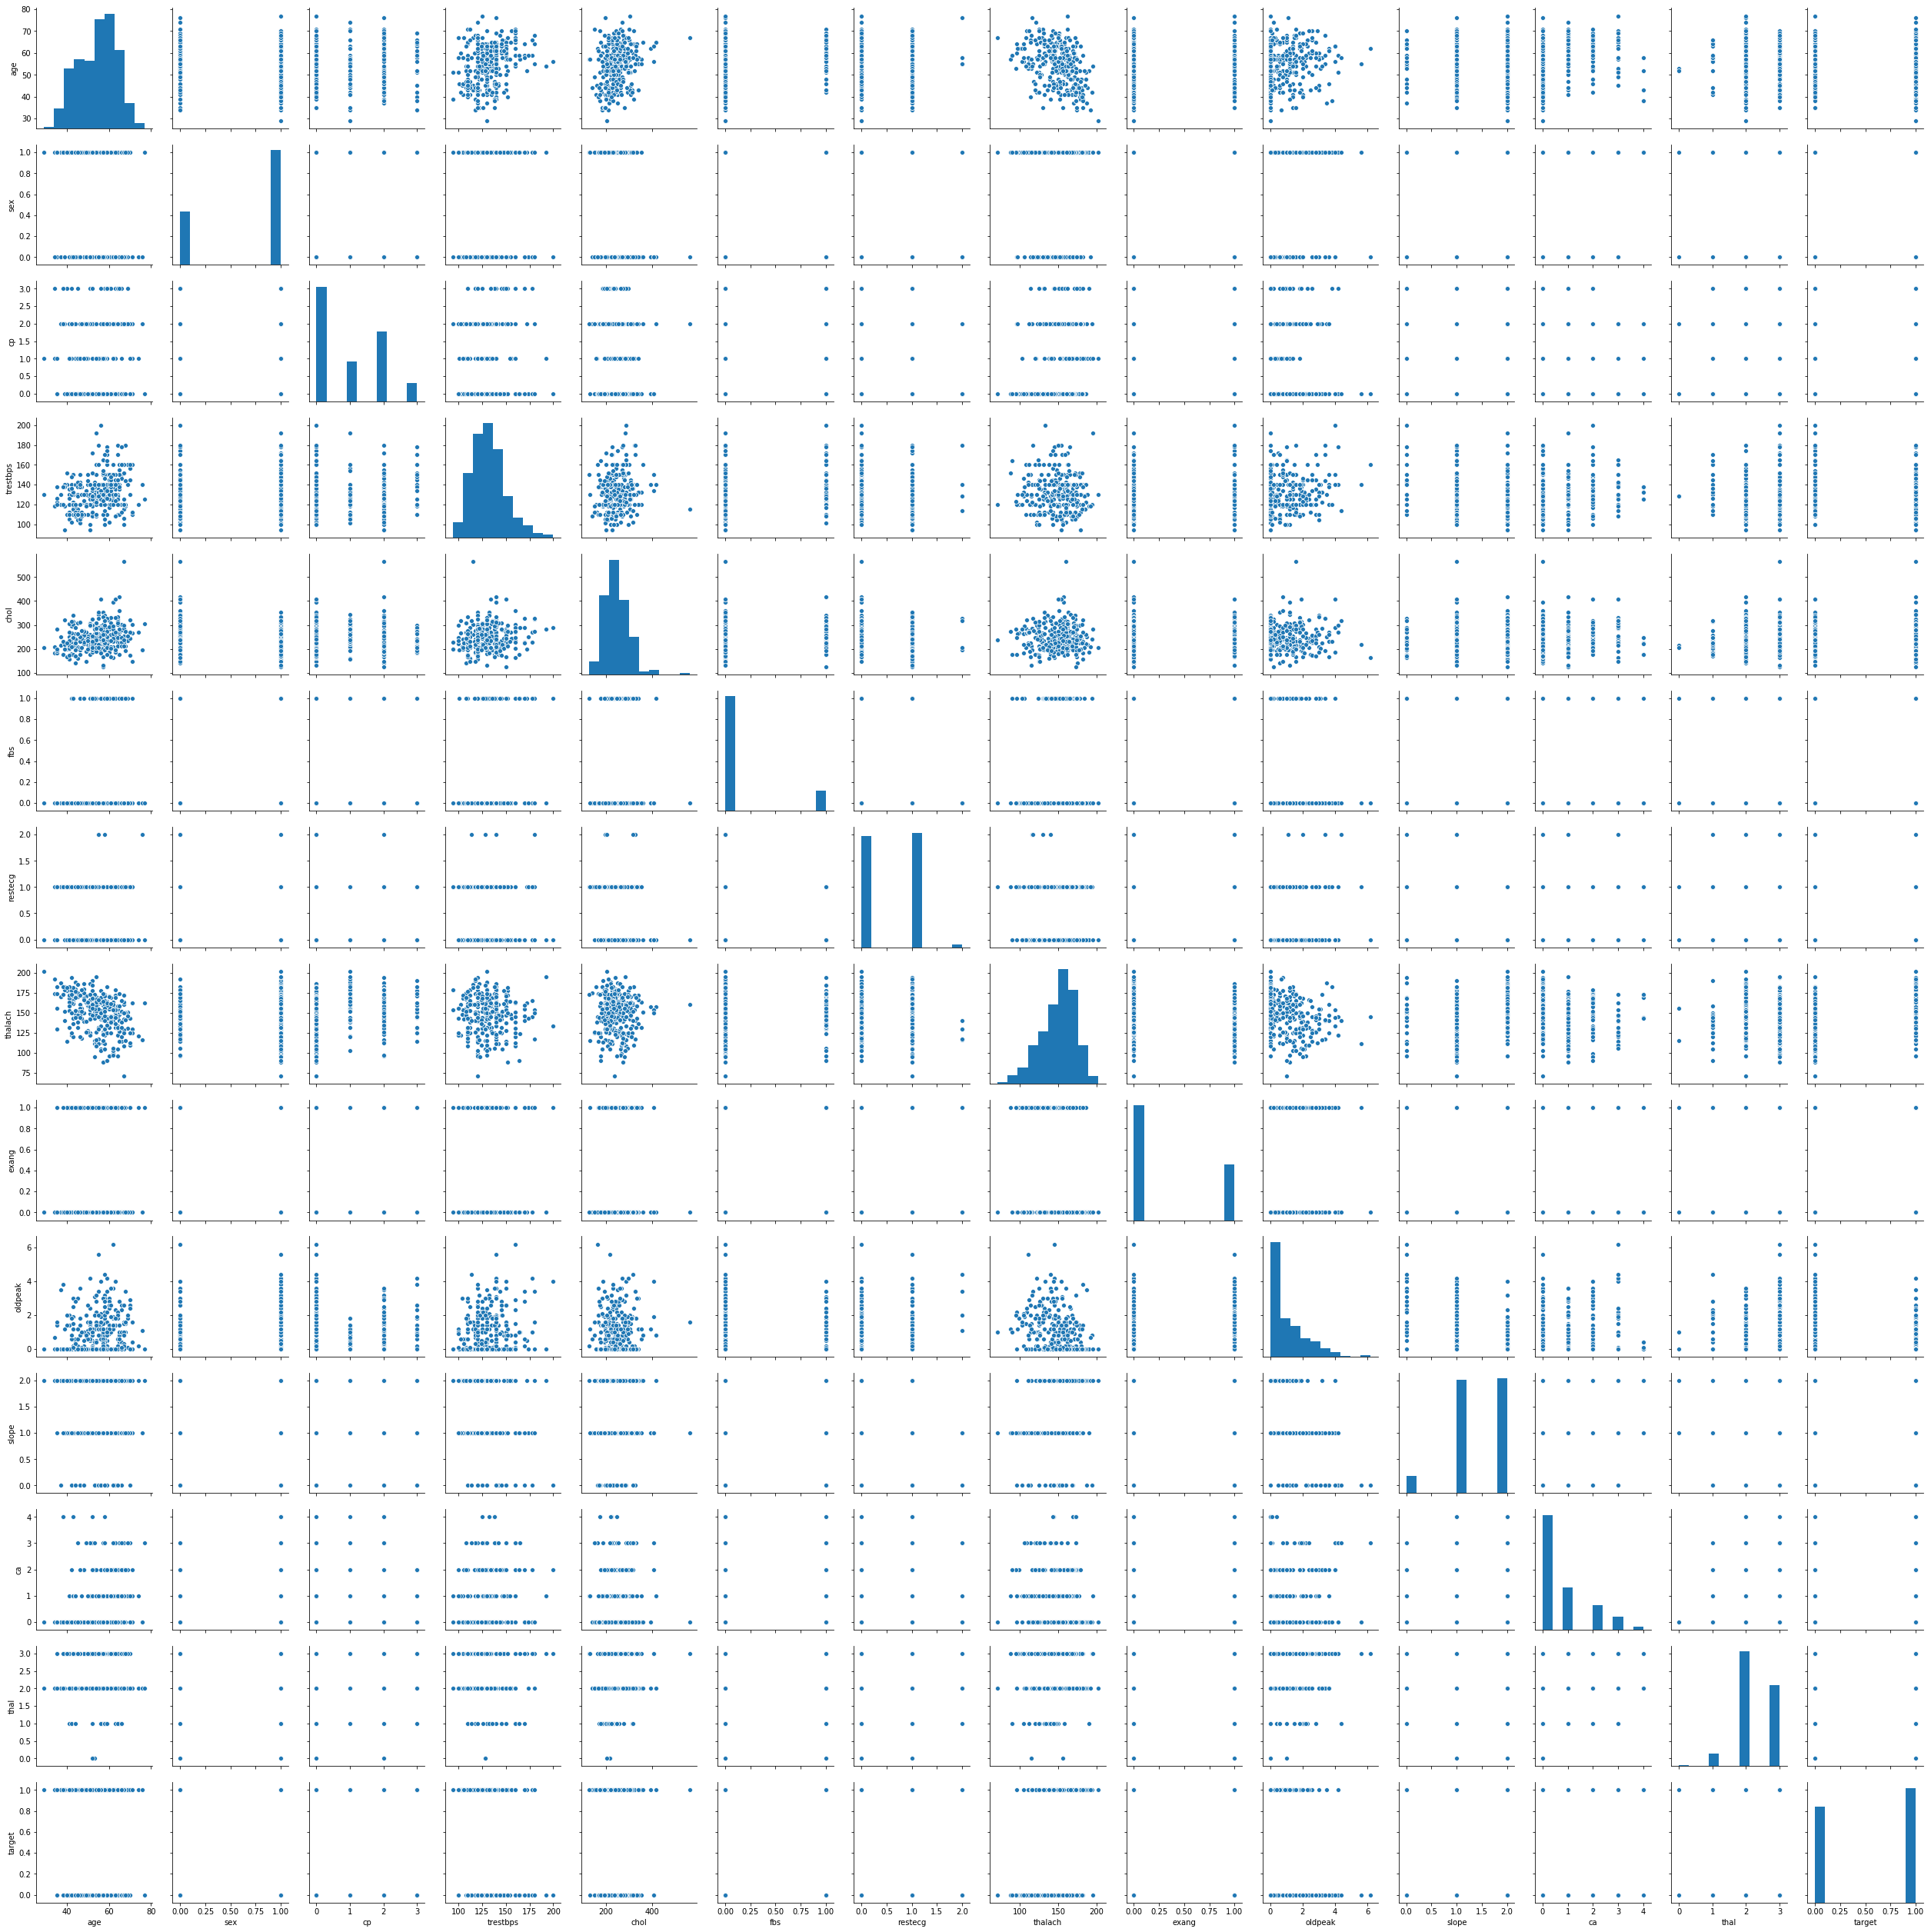

In [6]:
sns.pairplot(df)

In [7]:
df.isnull().sum().sum()

0

In [9]:
X = df.drop(["target"],1)
y = df["target"]

In [10]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=.33,
                                                   random_state=2)

In [11]:
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((203, 13), (100, 13), (203,), (100,))

In [12]:
from tpot import TPOTClassifier
tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2,
                     n_jobs=-1)

In [13]:
tpot.fit(train_x, train_y)

Generation 1 - Current best internal CV score: 0.8326829268292684
Generation 2 - Current best internal CV score: 0.8326829268292684
Generation 3 - Current best internal CV score: 0.8374390243902438
Generation 4 - Current best internal CV score: 0.8374390243902438
Generation 5 - Current best internal CV score: 0.8374390243902438

Best pipeline: GradientBoostingClassifier(Binarizer(input_matrix, threshold=0.8500000000000001), learning_rate=0.01, max_depth=8, max_features=0.05, min_samples_leaf=7, min_samples_split=5, n_estimators=100, subsample=1.0)


TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=5,
        disable_update_check=False, early_stop=None, generations=5,
        max_eval_time_mins=5, max_time_mins=None, memory=None,
        mutation_rate=0.9, n_jobs=-1, offspring_size=None,
        periodic_checkpoint_folder=None, population_size=50,
        random_state=None, scoring=None, subsample=1.0,
        template='RandomTree', use_dask=False, verbosity=2,
        warm_start=False)

In [14]:
print("Accuracy is {}".format(tpot.score(test_x,test_y)))

Accuracy is 0.83


In [18]:

from sklearn.model_selection import StratifiedKFold,cross_val_score,cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,classification_report

In [19]:
k_fold = StratifiedKFold(n_splits=10)
classifiers = []

In [20]:
classifiers.append(LogisticRegression())
classifiers.append(KNeighborsClassifier())
classifiers.append(DecisionTreeClassifier())
classifiers.append(svm.SVC())
classifiers.append(RandomForestClassifier())
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(),learning_rate=0.1))
classifiers.append(GradientBoostingClassifier())
classifiers.append(ExtraTreesClassifier())

In [21]:
results_list=[]
means=[]
stds=[]

for classifier in classifiers:
    results_list.append(cross_val_score(classifier,X,y, scoring='accuracy',
                                      cv=k_fold,n_jobs=-1))

for i in results_list:
    means.append(i.mean())
    stds.append(i.std())
    
cv_res=pd.DataFrame({'cross_val_means':means,'cross_val_errors':stds,
                     'Algorithm':['Logistic Regression','Decision Tree',
                                  'Random Forest','AdaBoost',
                                  'Gradient Boosting',
                                  'Extra Trees Classifier','SVM', 'KNN']})    


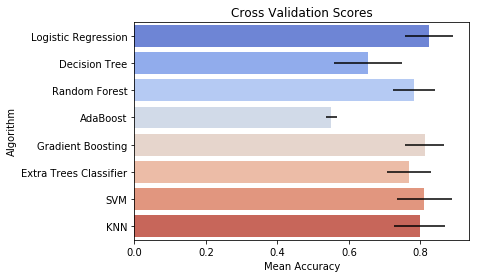

In [22]:
g=sns.barplot(cv_res.cross_val_means,cv_res.Algorithm,data=cv_res,
              palette='coolwarm',orient='h',**{'xerr':stds})
g.set_xlabel('Mean Accuracy')
g=g.set_title('Cross Validation Scores')

In [23]:
logreg = LogisticRegression()
logreg.fit(train_x, train_y)
y_hat = logreg.predict(test_x)
print("Accuracy is {}".format(accuracy_score(test_y, y_hat)))

Accuracy is 0.9


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [24]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(train_x, train_y)
y_hat_knn = knn.predict(test_x)
print("Accuracy is {}".format(accuracy_score(test_y, y_hat_knn)))


Accuracy is 0.71


In [25]:
Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(train_x,train_y)
    yhat=neigh.predict(test_x)
    mean_acc[n-1] = accuracy_score(test_y, yhat)

    
    std_acc[n-1]=np.std(yhat==test_y)/np.sqrt(yhat.shape[0])
mean_acc

array([0.64, 0.54, 0.69, 0.67, 0.71, 0.68, 0.72, 0.68, 0.69, 0.69, 0.68,
       0.72, 0.7 , 0.74, 0.73, 0.71, 0.71, 0.7 , 0.73])

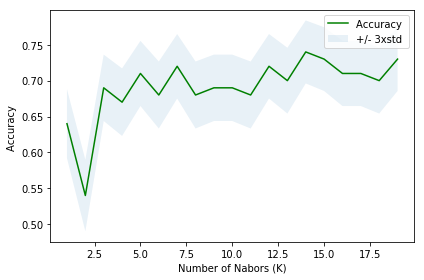

The best accuracy was with 0.74 with k= 14


In [26]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with k=", 
      mean_acc.argmax()+1) 


So the logistic regression scored better.

In [27]:
confusion_m=confusion_matrix(test_y,y_hat)

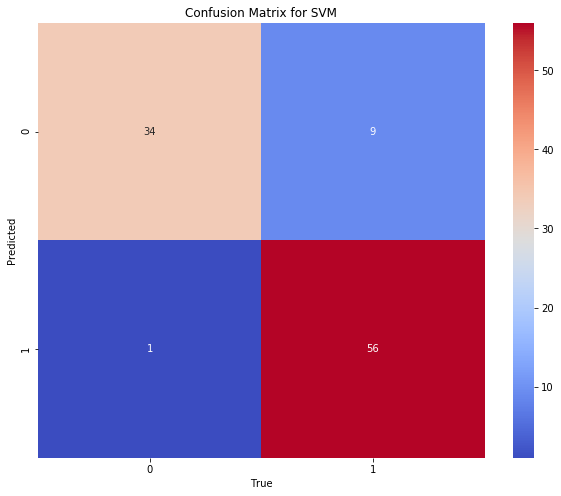

In [28]:
sns.heatmap(confusion_m,annot=True,fmt='d',cmap='coolwarm')
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('Confusion Matrix for SVM')
plt.show();

In [29]:
print(classification_report(test_y,y_hat))

              precision    recall  f1-score   support

           0       0.97      0.79      0.87        43
           1       0.86      0.98      0.92        57

   micro avg       0.90      0.90      0.90       100
   macro avg       0.92      0.89      0.89       100
weighted avg       0.91      0.90      0.90       100



In [30]:
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator

features = X.values
training_x,testing_x,training_y,testing_y=train_test_split(features, y.values, random_state=None)



In [31]:
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=LogisticRegression(C=0.5,solver="liblinear",dual=False,penalty="l2")),
    LogisticRegression(C=20.0, dual=False, penalty="l2"))

exported_pipeline.fit(training_x, training_y)
results = exported_pipeline.predict(testing_x)
results

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0])